In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [61]:
df = pd.read_csv('train.csv')
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;


In [62]:
df.tail()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
24778,3,0,2,1,1,"you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel right! His TL is trash &#8230;. Now, mine? Bible scriptures and hymns&#8221;"
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again
24781,6,0,6,0,1,youu got wild bitches tellin you lies
24782,3,0,0,3,2,"~~Ruffled | Ntac Eileen Dahlia - Beautiful color combination of pink, orange, yellow &amp; white. A Coll http://t.co/H0dYEBvnZB"


In [63]:
df['class'].unique()

array([2, 1, 0])

In [64]:
df['class'].value_counts()

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


In [66]:
df.describe()


,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [67]:
print(df.isnull().sum())

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [69]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [70]:
X=df['tweet']
y= df['class']
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized,y,test_size=0.3,random_state=45)

In [71]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train) 

y_pred = rf.predict(X_test) 

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8617350369872226


In [72]:
from sklearn.metrics import classification_report
X = df['tweet']
y = df['class']

# Preprocess the text
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8890457938269114
              precision    recall  f1-score   support

           0       0.57      0.14      0.22       290
           1       0.90      0.97      0.94      3832
           2       0.84      0.79      0.81       835

    accuracy                           0.89      4957
   macro avg       0.77      0.63      0.66      4957
weighted avg       0.87      0.89      0.87      4957



In [73]:
x = df['tweet']
Y= df['class']
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(x)
dc= DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X_vectorized,Y,test_size=0.3,random_state=45)
dc.fit(X_train, y_train)
y_pred = dc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))

Accuracy: 0.8843308675184937


prediction before any cleaning is completed, moving on to some eda to see the relations

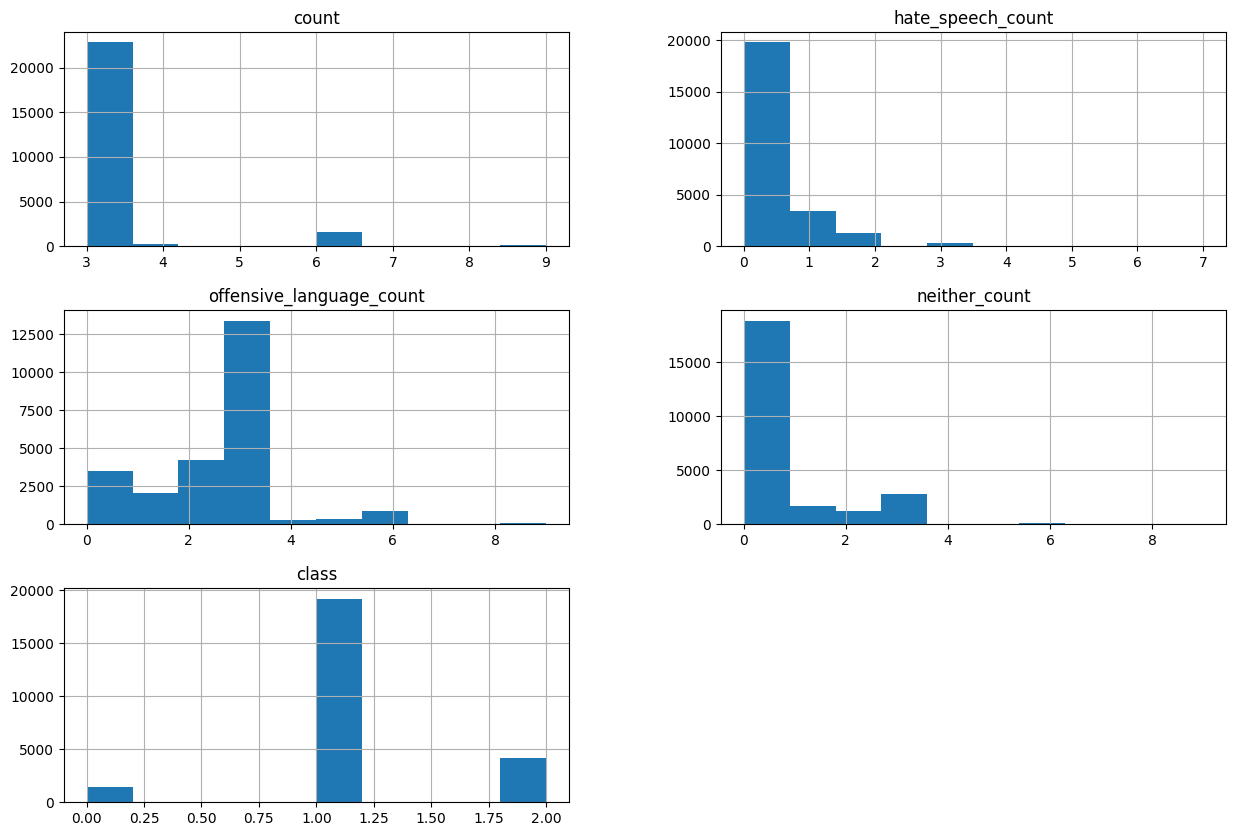

In [74]:
df.hist(bins=10, figsize=(15,10))
plt.show()

The graph clearly demonstrates that the majority of user-inputted words are neither offensive nor hateful. This is evident from the strong representation of Class 1, which highlights the predominance of non-offensive language.

Incidences on offensive language and hateful speech are relatively low 

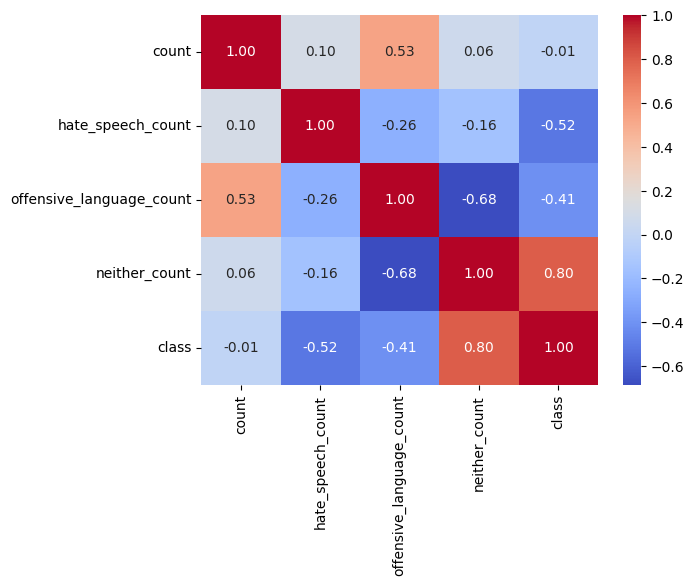

In [75]:
correlation_matrix=df.drop(columns=['tweet']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Although 53% of the total count appears to contain offensive language, there is an 80% likelihood that these instances ultimately ended up not classified as offensive or hate speech. This suggests a moderate correlation between the overall count and offensive language but a stronger tendency for words to fall into the "neither" category rather than being flagged as hate speech or offensive content.

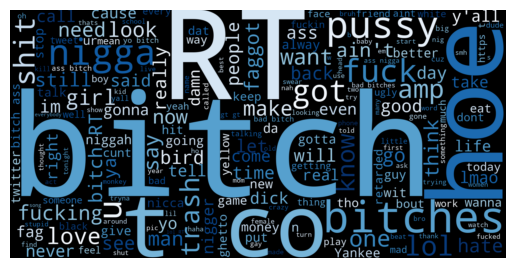

In [76]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000, height=1000, colormap="Blues").generate(" ".join(df['tweet']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This word cloud visualizes the most common offensive or negative words inputted by users, with the most frequently occurring words appearing largest and the least frequent ones appearing smallest. From this, we can infer that 'bitch' is the most frequently used word, followed by 'hoe' and 'pussy'. 'RT' although appears as the 2nd largest, it stands for 'retweet' which in this case is not an offensive or hateful word/speech 

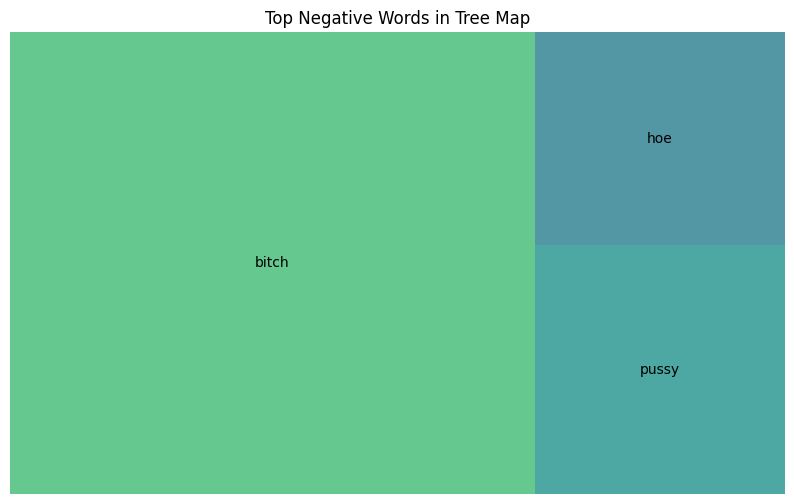

In [77]:
import squarify

# Sample data preparation
text_data = df['tweet'].str.cat(sep=' ')
words = text_data.lower().split()

# Count negative words (example list)
negative_words = ['bitch', 'hoe', 'pussy']
word_counts = {word: words.count(word) for word in negative_words if word in words}

# Sorting and preparing data for visualization
top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10])

# Create the Tree Map
plt.figure(figsize=(10, 6))
squarify.plot(sizes=top_words.values(), label=top_words.keys(), alpha=.8)
plt.title('Top Negative Words in Tree Map')
plt.axis('off')
plt.show()

The graph above showcases the top three most frequently occurring negative words found in tweets, providing insight into the most commonly used offensive language. These words stand out due to their high frequency, indicating recurring trends in user input.

combining both 

In [78]:
df['combined_class']=df['class'].apply(lambda x:'good' if x==2 else'bad')
df= df.drop(columns=['hate_speech_count','offensive_language_count','neither_count'])
df.head()

,count,class,tweet,combined_class
0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,good
1,3,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,bad
2,3,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,bad
3,3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,bad
4,6,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,bad


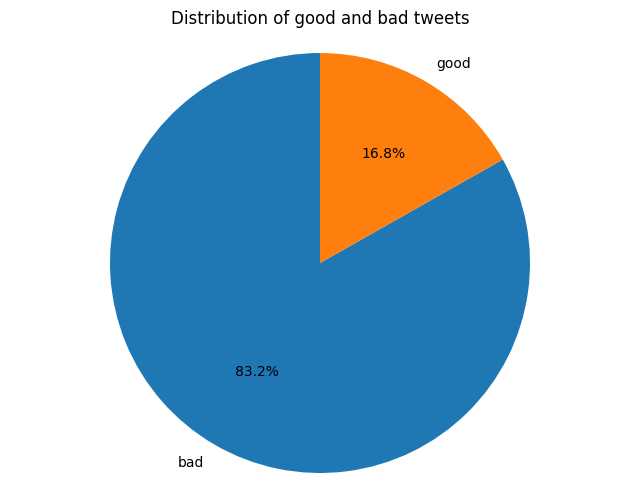

In [79]:
class_count = df['combined_class'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(
    class_count,  # Values for each slice
    labels=class_count.index,  # Labels for each slice
    autopct='%1.1f%%',  # Show percentage on each slice
    startangle=90  # Rotate the start of the pie chart
)
plt.title('Distribution of good and bad tweets')
plt.axis('equal') 

plt.show()

using functions to clean the text of the tweets

In [80]:
import re

#manually add the bad words that are in the tweets
bad_words=['bitch','nigga','hoe','pussy','bitches','fuck','retarded','nicca','trash','shit','fucking',
           'ass','faggot','']

def clean_bad_words(tweet,bad_words): #function to clean the bad words
    pattern = re.compile(r'\b(' + '|'.join(re.escape(word) for word in bad_words) + r')\b', re.IGNORECASE)
    #compile the badwords together
    #use \b to ensure we match whole words
    # re.IGNORECASE to ignore the cases of text eg: ABC or AbC are the same
    
    return pattern.sub('', tweet).strip() #replace the bad word with a '' <blank space> 

df['cleanse_tweet'] = df['tweet'].apply(lambda x: clean_bad_words(str(x), bad_words)) 
#create a new class 

#displaying the before and after
pd.set_option('display.max_colwidth', None)
print(df[['tweet','cleanse_tweet']].head(10))
#df.to_csv('sr_cleanse_tweets.csv',index=False)

                                                                                                                                                            tweet  \
0                    !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...   
1                                                                           !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!   
2                                        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit   
3                                                                                                  !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny   
4                       !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;   
5  !!!!!!!

now that we know we successfully cleanse the bad words, we now try cleansing the special characters

In [81]:
import re

bad_words=['bitch','nigga','hoe','pussy','bitches','fuck','retarded','nicca','trash','shit','fucking',
           'ass','faggot','']

def clean_bad_words(tweet,bad_words): 
    pattern = re.compile(r'\b(' + '|'.join(re.escape(word) for word in bad_words) + r')\b', re.IGNORECASE)
    tweet = pattern.sub('', tweet).strip()

    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove special characters with spaces
    tweet = re.sub(r'\s+', ' ', tweet)  # Replace multiple spaces with a single space
    
    return tweet.strip()

df['cleanse_tweet'] = df['tweet'].apply(lambda x: clean_bad_words(str(x), bad_words))

pd.set_option('display.max_colwidth', None)
print(df[['tweet','cleanse_tweet']].head(10))
df.to_csv('sr_cleanse_tweets.csv',index=False)

                                                                                                                                                            tweet  \
0                    !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...   
1                                                                           !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!   
2                                        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit   
3                                                                                                  !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny   
4                       !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;   
5  !!!!!!!

In [82]:
df.head()

,count,class,tweet,combined_class,cleanse_tweet
0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...,good,RT mayasolovely As a woman you shouldnt complain about cleaning up your house amp as a man you should always take the out
1,3,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,bad,RT mleew17 boy dats coldtyga dwn bad for cuffin dat in the 1st place
2,3,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit,bad,RT UrKindOfBrand Dawg RT 80sbaby4life You ever a and she start to cry You be confused as
3,3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny,bad,RT C_G_Anderson viva_based she look like a tranny
4,6,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;,bad,RT ShenikaRoberts The you hear about me might be true or it might be faker than the who told it to ya 57361


cleanse tweet looks good so now lets try to redo prediction to see the before and after accuracy of the models

In [83]:
# Prepare data for original 'tweet' column
X_original = df['tweet']
y_original = df['combined_class']
# Prepare data for 'cleanse_tweet' column
X_cleaned = df['cleanse_tweet']
y_cleaned = df['combined_class']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_original_vectorized = vectorizer.fit_transform(X_original)# Original tweets
X_cleaned_vectorized = vectorizer.fit_transform(X_cleaned)# Cleaned tweets

models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier()
}

def evaluate_model(model, X, y, data_label=""):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)   
    print(f"\n{data_label} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
# Evaluate on original tweets
print("Results for Original Tweets:")
for name, model in models.items():
    evaluate_model(model, X_original_vectorized, y_original, data_label=f"{name} (Original)")

# Evaluate on cleansed tweets
print("\nResults for Cleaned Tweets:")
for name, model in models.items():
    evaluate_model(model, X_cleaned_vectorized, y_cleaned, data_label=f"{name} (Cleaned)")    



Results for Original Tweets:

Random Forest (Original) Accuracy: 0.9132
              precision    recall  f1-score   support

         bad       0.91      0.99      0.95      6219
        good       0.91      0.52      0.66      1216

    accuracy                           0.91      7435
   macro avg       0.91      0.75      0.81      7435
weighted avg       0.91      0.91      0.90      7435


Logistic Regression (Original) Accuracy: 0.9284
              precision    recall  f1-score   support

         bad       0.93      0.98      0.96      6219
        good       0.88      0.65      0.75      1216

    accuracy                           0.93      7435
   macro avg       0.91      0.82      0.85      7435
weighted avg       0.93      0.93      0.92      7435


Decision Tree (Original) Accuracy: 0.9440
              precision    recall  f1-score   support

         bad       0.97      0.97      0.97      6219
        good       0.83      0.83      0.83      1216

    accuracy      

2 reason why the accuracy drop instead
1)  could be because of over-cleaning (excessive removal of words and symbols) which leads the model to become biased 
2)  could be due to our cleansed tweet still comparing with the original combined class label. Since the original label was based on the uncleaned tweet, a cleaned tweet that no longer contains offensive words might still be labeled as bad, leading to incorrect classifications and a drop in accuracy

In [84]:
# Relabel based on whether the cleaned tweet is empty or still has content
# good if the tweet is empty, bad if the tweet is not empty
df['cleaned_class'] = df['cleanse_tweet'].apply(lambda x: 'good' if not x.strip() else 'bad')

# Prepare data for original 'tweet' column
X_original = df['tweet']
y_original = df['combined_class']
# Prepare data for 'cleanse_tweet' column with updated labels
X_cleaned = df['cleanse_tweet']
y_cleaned = df['cleaned_class']

# Vectorizing
vectorizer = TfidfVectorizer()
X_original_vectorized = vectorizer.fit_transform(X_original)# Original tweets
X_cleaned_vectorized = vectorizer.fit_transform(X_cleaned)# Cleaned tweets

#rerun the models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier()
}

def evaluate_model(model, X, y, data_label=""):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{data_label} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred,zero_division=1))

# Evaluate on the original tweets
print("Results for Original Tweets:")
for name, model in models.items():
    evaluate_model(model, X_original_vectorized, y_original, data_label=f"{name} (Original)")

# Evaluate on the cleaned tweets with updated labels
print("\nResults for Cleaned Tweets (Updated Labeling):")
for name, model in models.items():
    evaluate_model(model, X_cleaned_vectorized, y_cleaned, data_label=f"{name} (Cleaned)")


Results for Original Tweets:

Random Forest (Original) Accuracy: 0.9096
              precision    recall  f1-score   support

         bad       0.91      0.99      0.95      6219
        good       0.91      0.50      0.64      1216

    accuracy                           0.91      7435
   macro avg       0.91      0.74      0.80      7435
weighted avg       0.91      0.91      0.90      7435


Logistic Regression (Original) Accuracy: 0.9284
              precision    recall  f1-score   support

         bad       0.93      0.98      0.96      6219
        good       0.88      0.65      0.75      1216

    accuracy                           0.93      7435
   macro avg       0.91      0.82      0.85      7435
weighted avg       0.93      0.93      0.92      7435


Decision Tree (Original) Accuracy: 0.9442
              precision    recall  f1-score   support

         bad       0.97      0.96      0.97      6219
        good       0.82      0.84      0.83      1216

    accuracy      

Therefore after fixing our mistake with the label, we are able to see that now our accuracy level after the cleaning increase as desired 